In [1]:
import warnings
warnings.filterwarnings("ignore") 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus
import graphviz
import missingno as msno 

from sklearn.metrics import classification_report, confusion_matrix,cohen_kappa_score,accuracy_score
from sklearn.model_selection import cross_val_score, ShuffleSplit, RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn import tree
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import KFold

In [2]:
dataset=pd.read_csv('./CE802_P2_Data/CE802_P2_Data.csv')
dataset.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
0,-1,45,-7.97,0.54,3,0.50,-113.34,20.30,9.99,20.50,-5.52,3.60,-466.22,1.88,-7.49,True
1,1,27,-7.02,1.08,3,0.85,-47.34,20.00,2.88,19.40,-6.49,1.22,-470.22,0.57,NaN,True
2,-2,0,-8.82,0.56,3,0.45,-152.34,19.62,9.78,20.74,-5.21,2.08,-534.22,5.62,-5.74,False
3,-14,855,-3.23,12.00,30,7.45,-341.34,34.76,-10.14,14.38,-4.79,-2.52,-846.22,-4.17,NaN,True
4,-1,39,-8.12,2.88,3,0.76,-53.34,19.08,6.48,22.58,-7.52,1.24,-512.22,2.17,NaN,False


False    809
True     691
Name: Class, dtype: int64


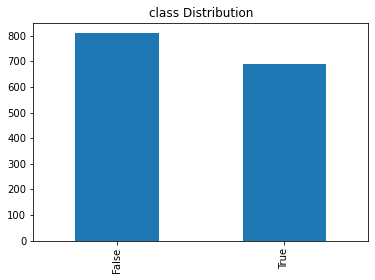

In [3]:
#Checking the Class value count to check if its balanced data
print(dataset['Class'].value_counts())
dataset['Class'].value_counts().plot(kind = 'bar', title = 'class Distribution')

The Target 'Class' is almost evenly distributed. Hence, there is no need of any SMOTE or oversampling technique

In [4]:
#changing the target class to 0 or 1 for easy computation 0 for False and 1 for True
dataset["Class"] = dataset["Class"].apply(lambda x: 0 if x == False else 1)

In [5]:
dataset.corr()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,Class
F1,1.000000,-0.600153,-0.630234,-0.637508,-0.738079,-0.697186,0.238974,-0.681754,0.614027,0.637027,-0.336565,0.620092,0.599113,0.611943,-0.230740,0.144057
F2,-0.600153,1.000000,0.679250,0.706639,0.742369,0.733312,0.069969,0.755121,-0.690864,-0.675264,0.012291,-0.676389,-0.540342,-0.682649,0.239084,-0.152249
F3,-0.630234,0.679250,1.000000,0.755101,0.873724,0.861852,0.215099,0.884842,-0.813816,-0.826213,0.167082,-0.802995,-0.599455,-0.804192,0.161148,-0.079108
F4,-0.637508,0.706639,0.755101,1.000000,0.888977,0.834246,0.194739,0.837365,-0.763419,-0.762769,0.276405,-0.753287,-0.672167,-0.750944,0.297380,-0.191255
F5,-0.738079,0.742369,0.873724,0.888977,1.000000,0.954840,0.194345,0.956640,-0.868528,-0.877293,0.229981,-0.865109,-0.744822,-0.863027,0.318372,-0.203649
F6,-0.697186,0.733312,0.861852,0.834246,0.954840,1.000000,0.203882,0.906307,-0.863434,-0.867305,0.201330,-0.854378,-0.721849,-0.855536,0.234449,-0.135190
F7,0.238974,0.069969,0.215099,0.194739,0.194345,0.203882,1.000000,0.224060,-0.205886,-0.207080,-0.251693,-0.192413,-0.088436,-0.207789,0.071379,-0.050738
F8,-0.681754,0.755121,0.884842,0.837365,0.956640,0.906307,0.224060,1.000000,-0.883349,-0.887500,0.182643,-0.873428,-0.727545,-0.873595,0.195861,-0.080522
F9,0.614027,-0.690864,-0.813816,-0.763419,-0.868528,-0.863434,-0.205886,-0.883349,1.000000,0.809473,-0.176375,0.791322,0.614240,0.804545,-0.175460,0.057144
F10,0.637027,-0.675264,-0.826213,-0.762769,-0.877293,-0.867305,-0.207080,-0.887500,0.809473,1.000000,-0.181686,0.818105,0.619599,0.807678,-0.176167,0.058308


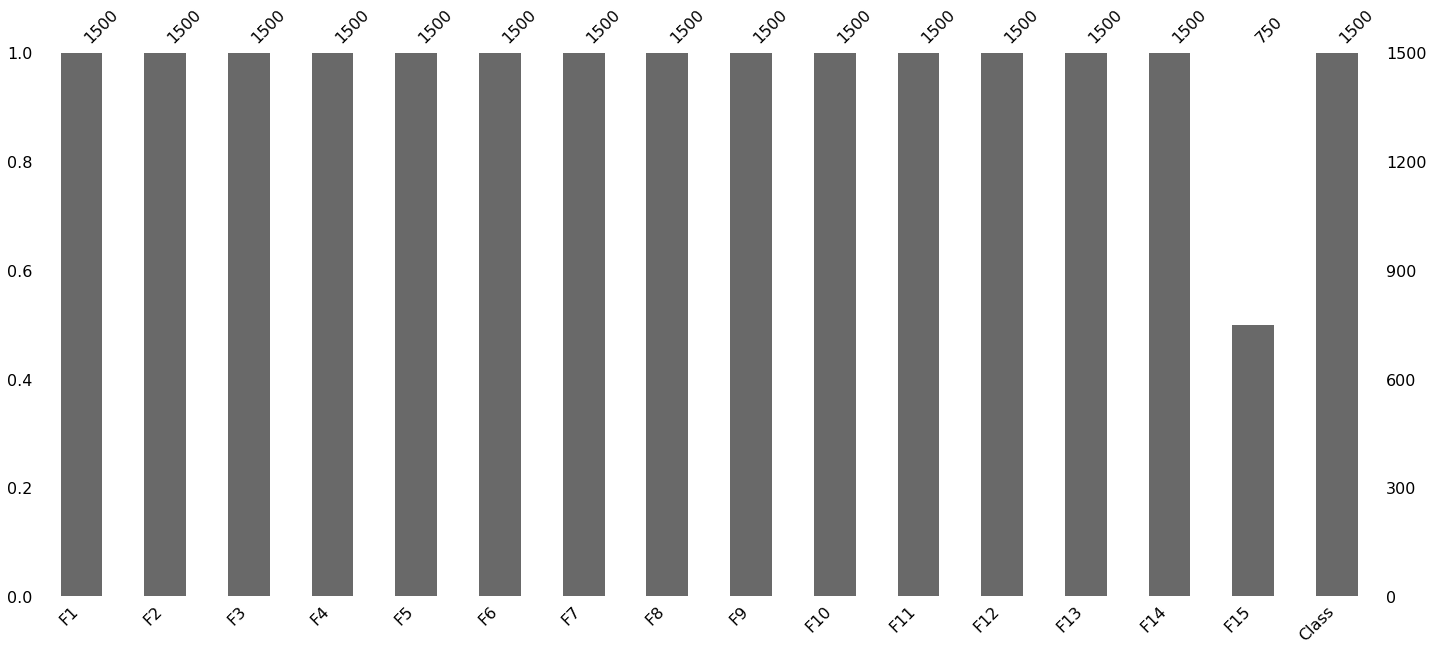

In [6]:
#Checkin if there is any null for any columns 
msno.bar(dataset) 

### There are 750 nulls for F15 columns . we can use any of below methods to fix this 
1. Removing F15 feature 
2. Replace all null with 0 
3. Replace all null with Mean or Median (Mean or Median Imputer)

Removing the rows with null values could be an option,However, this is not advisible as we have few training data. We might loose other sensitive information

We will implement Decision Tree to select the best method to fill F15, Based on accuracy of the models
### 1. Removing F15 feature 

In [7]:
X=dataset.iloc[:,:-2]
Y=dataset['Class']
X_train, X_val, Y_train, Y_val = train_test_split(X, Y,test_size=0.2, random_state=30)

grid_param = {'criterion': ['gini', 'entropy'],'max_depth' : range(2,30,1),'min_samples_split': range(5,20,1)}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid_param,cv=5,n_jobs =-1, verbose=2)
grid_search.fit(X_train,Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:",grid_search.best_score_)

Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 616 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 2240 tasks      | elapsed:   15.1s


Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_split': 10}
Accuracy: 0.7891666666666667


[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:   28.4s finished


### 2. Replacing Null in F15 with 0

In [8]:
dataset['F15'].fillna(0, inplace=True)

X=dataset.iloc[:,:-1]
Y=dataset['Class']
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=30)

grid_param = {'criterion': ['gini', 'entropy'],'max_depth' : range(2,30,1),'min_samples_split': range(5,20,1)}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid_param,cv=5,n_jobs =-1, verbose=2)
grid_search.fit(X_train,Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:",grid_search.best_score_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 3908 tasks      | elapsed:   29.7s


Best Parameters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_split': 5}
Accuracy: 0.8083333333333333


[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:   32.6s finished


### 3. Replacing all Null in F15 with Mean value (Mean Imputer)

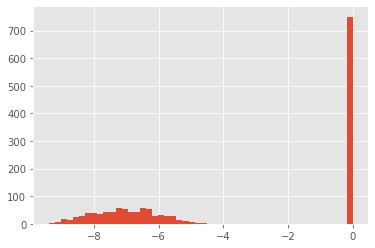

Mean: -3.5215066666666646
Median: -2.16


In [9]:
# Plotting the distribution of f15 in order to check if we can replace it with Mean or median
plt.style.use('ggplot')
plt.hist(dataset['F15'], bins=50)
plt.show()
print("Mean:",dataset['F15'].mean()) 
print("Median:",dataset['F15'].median()) 

#### As the data seems to be nearly normal distributed and the mean and median are almost same. We can say that there are no outliers for column F15 . Hence, replacing the null values with mean would be one of the solutions that must be implemented


In [10]:
dataset['F15'].fillna(dataset['F15'].mean(), inplace=True)
X=dataset.iloc[:,:-1]
Y=dataset['Class']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=30)

grid_param = {'criterion': ['gini', 'entropy'],'max_depth' : range(2,30,1),'min_samples_split': range(5,20,1)}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=grid_param,cv=5,n_jobs =-1, verbose=2)
grid_search.fit(X_train,Y_train)

print("Best Parameters:", grid_search.best_params_)
print("Accuracy:",grid_search.best_score_)


Fitting 5 folds for each of 840 candidates, totalling 4200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 896 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 2520 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 4064 tasks      | elapsed:   38.3s


Best Parameters: {'criterion': 'entropy', 'max_depth': 23, 'min_samples_split': 6}
Accuracy: 0.8091666666666667


[Parallel(n_jobs=-1)]: Done 4200 out of 4200 | elapsed:   39.7s finished


### As we got best result in Option 3, we will replace the Nulls in F15 with its mean Value 

In [11]:
dataset['F15'].fillna(dataset['F15'].mean(), inplace=True)
X=dataset.iloc[:,:-1]
Y=dataset['Class']

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=30)

scalerx = MinMaxScaler()
x_train_scaled = scalerx.fit_transform(X_train)
x_val_scaled = scalerx.transform(X_val)



# Decision Tree

In [12]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred=dtc.predict(X_val)
print(classification_report(Y_val, pred))
print('Train Score: ', dtc.score(X_train, Y_train))
print('Test Score: ', dtc.score(X_val, Y_val))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       162
           1       0.77      0.75      0.76       138

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300

Train Score:  1.0
Test Score:  0.78


#### The Decision Tree is fulling grown. Hence, it has overfitted. We can see that the Training accuracy is 100%, where as test accuracy is nearly 80%. It has Generalization error. 

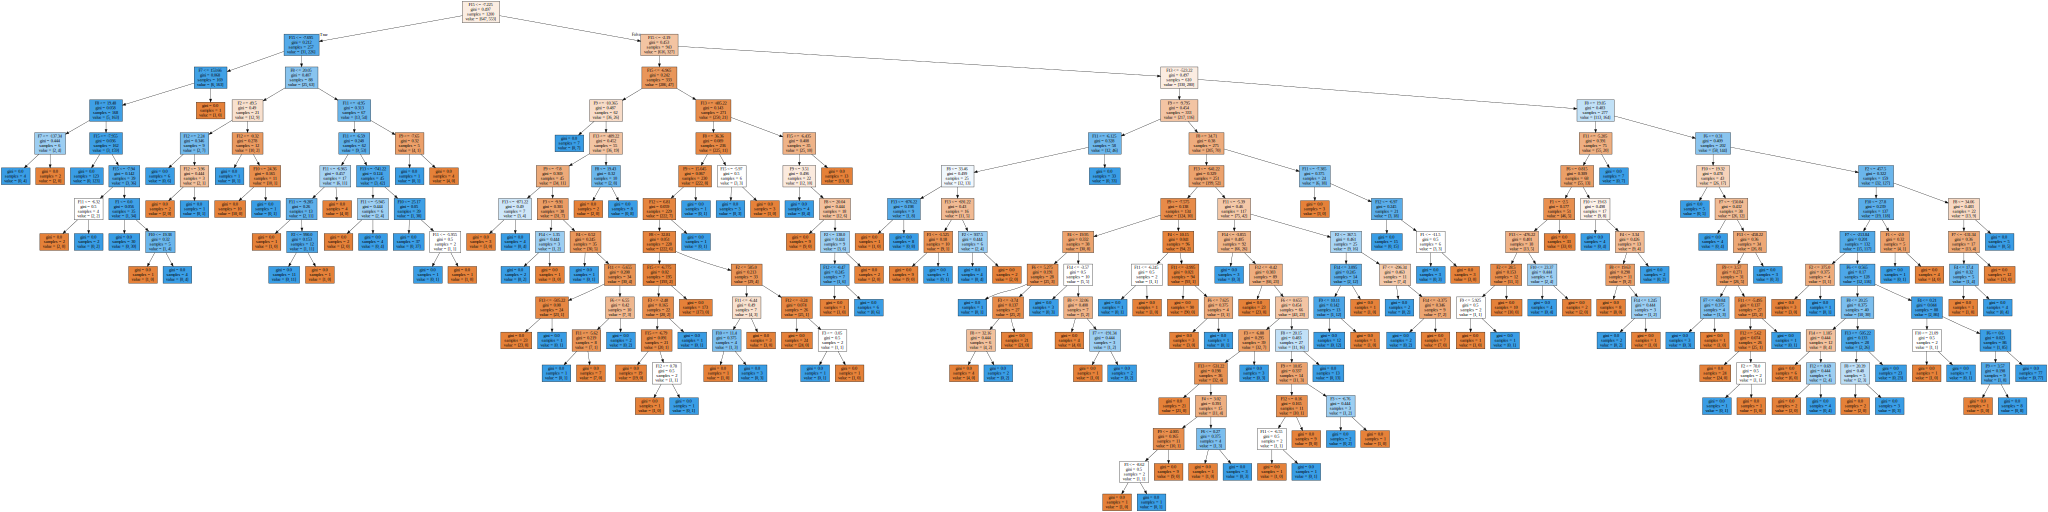

In [13]:
# decision Tree plotting
feature_name=list(X.columns)
class_name = list(Y.unique())
dot_data = tree.export_graphviz(dtc,out_file=None, 
                                feature_names=feature_name,  
                                 filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

#### As this Model is highly Overfitted. We will need to Prune the Decision Tree
Below Techniques are implemented
1. Pre-Pruning
2. Post-Pruining

## 1. Pre-Prunning

In [14]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,30,1),
    'min_samples_leaf' : range(1,5,1),
    'min_samples_split': range(5,20,1)   
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=32),
                            param_grid=grid_param,
                            cv=10, n_jobs =-1, verbose=2)

grid_search.fit(X_train,Y_train)
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:",grid_search.best_score_)

Fitting 10 folds for each of 3360 candidates, totalling 33600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 1316 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 2448 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 3908 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 5688 tasks      | elapsed:   55.3s
[Parallel(n_jobs=-1)]: Done 7796 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 10224 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 12980 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 16056 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 19460 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 23184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 27236 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 31608 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 33600 out

Best Parameters: {'criterion': 'entropy', 'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 7}
Accuracy: 0.8


In [15]:
dtc_pre = DecisionTreeClassifier(criterion='gini', max_depth=9, min_samples_leaf=2, min_samples_split=7, splitter ='random',random_state=32)
dtc_pre.fit(X_train,Y_train)
predicted_pre=dtc_pre.predict(X_val)

print('Train Accuracy for Pre-Prunned Tree: ', dtc_pre.score(X_train, Y_train))
print('Test Accuracy for Pre-Prunned Tree:', dtc_pre.score(X_val, Y_val))
print('Classification Report:\n',classification_report(Y_val, predicted_pre))
print('Confusion Matrix:\n',confusion_matrix(Y_val, predicted_pre))
print('Kappa Score: ',cohen_kappa_score(Y_val, predicted_pre)) 

#using cross validation to get the accuracte model accuracy
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=32)
scores = cross_val_score(dtc_pre, X_train, Y_train, cv=cv)
print('Cross validation Score: ', np.mean(scores))

Train Accuracy for Pre-Prunned Tree:  0.905
Test Accuracy for Pre-Prunned Tree: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81       162
           1       0.80      0.70      0.74       138

    accuracy                           0.78       300
   macro avg       0.78      0.77      0.78       300
weighted avg       0.78      0.78      0.78       300

Confusion Matrix:
 [[138  24]
 [ 42  96]]
Kappa Score:  0.5528455284552846
Cross validation Score:  0.7470833333333333


## 2. Post Pruning

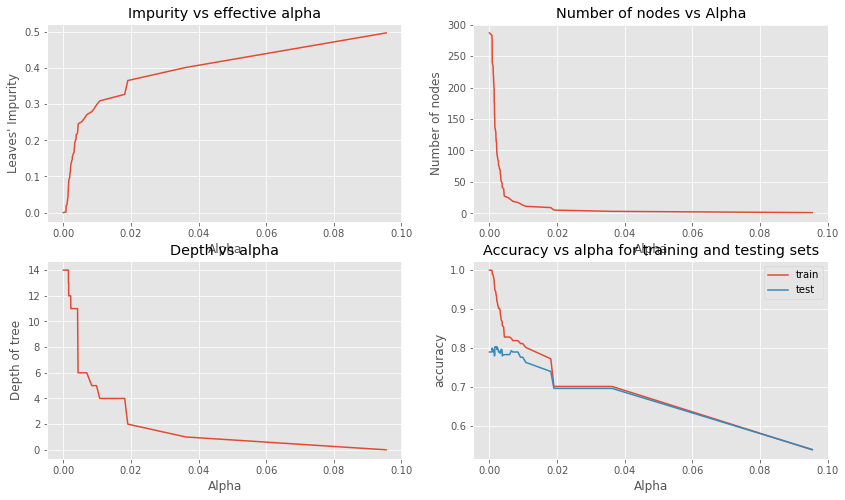

Train Accuracy for Post-Prunned Tree:  0.9491666666666667
Test Accuracy for Post-Prunned Tree: 0.8033333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.84      0.82       162
           1       0.80      0.76      0.78       138

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

Confusion Matrix:
 [[136  26]
 [ 33 105]]
Kappa Score:  0.6026400862068966
Cross validation Score:  0.7708333333333333


In [16]:
dtc_path=DecisionTreeClassifier(random_state=32).cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = dtc_path.ccp_alphas, dtc_path.impurities

fig, ax = plt.subplots(2,2,figsize=(14,8))
ax[0,0].plot(ccp_alphas, impurities)
ax[0,0].set_xlabel("Alpha")
ax[0,0].set_ylabel("Leaves' Impurity")
ax[0,0].set_title("Impurity vs effective alpha")

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=32,ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
ax[0,1].plot(ccp_alphas, node_counts)
ax[0,1].set_xlabel("Alpha")
ax[0,1].set_ylabel("Number of nodes")
ax[0,1].set_title("Number of nodes vs Alpha")
ax[1,0].plot(ccp_alphas,depth)
ax[1,0].set_xlabel("Alpha")
ax[1,0].set_ylabel("Depth of tree")
ax[1,0].set_title("Depth vs alpha")

train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_val, Y_val) for clf in clfs]

ax[1,1].set_xlabel("Alpha")
ax[1,1].set_ylabel("accuracy")
ax[1,1].set_title("Accuracy vs alpha for training and testing sets")
ax[1,1].plot(ccp_alphas, train_scores, label="train")        
ax[1,1].plot(ccp_alphas, test_scores, label="test")
ax[1,1].legend()
plt.show()

index_best_model = np.argmax(test_scores)
dtc_post = clfs[index_best_model]
predicted_post=dtc_post.predict(X_val)

print('Train Accuracy for Post-Prunned Tree: ', dtc_post.score(X_train, Y_train))
print('Test Accuracy for Post-Prunned Tree:', dtc_post.score(X_val, Y_val))
print('Classification Report:\n',classification_report(Y_val, predicted_post))
print('Confusion Matrix:\n',confusion_matrix(Y_val, predicted_post))
print('Kappa Score: ',cohen_kappa_score(Y_val, predicted_post)) 

# Applying cross validation
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=32)
scores = cross_val_score(dtc_post, X_train, Y_train, cv=cv)
print('Cross validation Score: ', np.mean(scores))

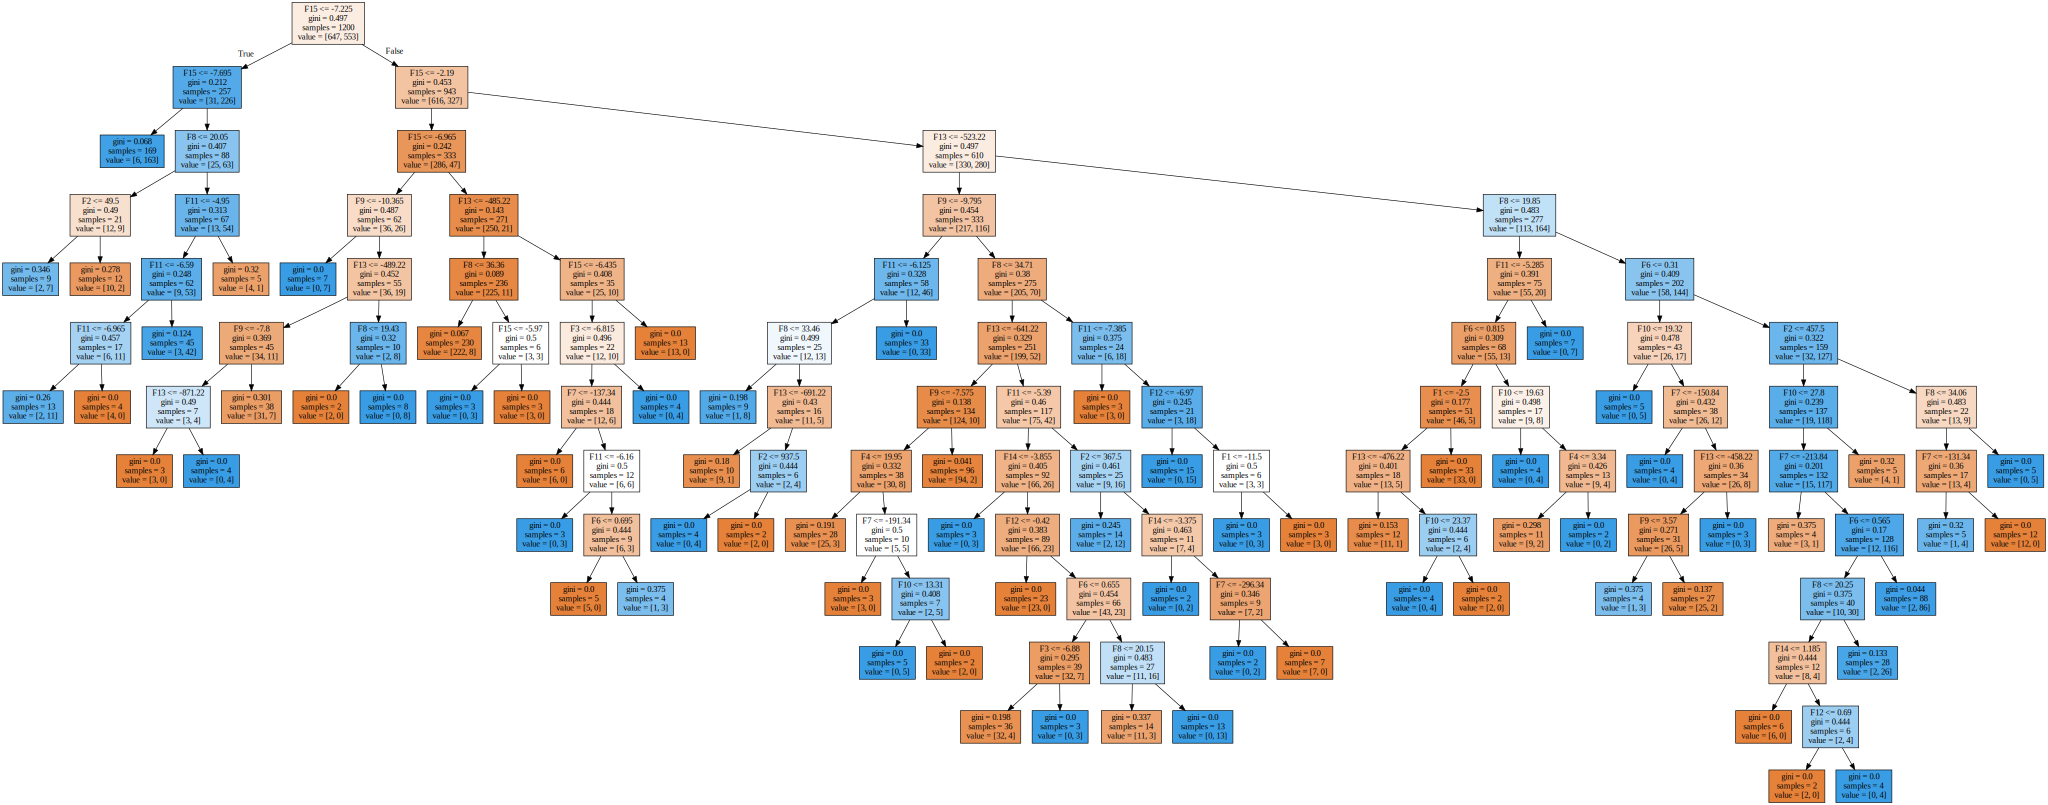

In [17]:
feature_name=list(X.columns)
class_name = list(Y.unique())
dot_data = tree.export_graphviz(dtc_post,out_file=None, 
                                feature_names=feature_name,  
                                 filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# Random Forest

Initailly we start with default parameters, Later we tune the hyper-parameters using grid search 

In [18]:
rfc = RandomForestClassifier(random_state=32)
rfc.fit(X_train,Y_train)
pred_rfc = rfc.predict(X_val)

print('Train Accuracy for Post-Prunned Tree: ', rfc.score(X_train, Y_train))
print('Test Accuracy for Post-Prunned Tree:', rfc.score(X_val, Y_val))
print('Classification Report:\n',classification_report(Y_val, pred_rfc))
print('Confusion Matrix:\n',confusion_matrix(Y_val, pred_rfc))
print('Kappa Score: ',cohen_kappa_score(Y_val, pred_rfc)) 

Train Accuracy for Post-Prunned Tree:  1.0
Test Accuracy for Post-Prunned Tree: 0.8266666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       162
           1       0.83      0.79      0.81       138

    accuracy                           0.83       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.83      0.83      0.83       300

Confusion Matrix:
 [[139  23]
 [ 29 109]]
Kappa Score:  0.6499730748519117


In [19]:
#Grid search parameters
rfc_grid = {'n_estimators': [int(x) for x in np.linspace(start=50, stop=1000, num=10)],
              'max_depth': range(3,30),'min_samples_leaf' : range(1,5,1),'min_samples_split': range(5,20,1) }
rfc_gs = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=32), param_distributions=rfc_grid, n_iter=100, cv=3, verbose=1, random_state=32)

rfc_gs.fit(X_train,Y_train)
pred_gs = rfc_gs.predict(X_val)

print('Train Accuracy for Post-Prunned Tree: ', rfc_gs.score(X_train, Y_train))
print('Test Accuracy for Post-Prunned Tree:', rfc_gs.score(X_val, Y_val))
print('Classification Report:\n',classification_report(Y_val, pred_gs))
print('Confusion Matrix:\n',confusion_matrix(Y_val, pred_gs))
print('Kappa Score: ',cohen_kappa_score(Y_val, pred_gs)) 
print("best Parameters:",rfc_gs.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  9.2min finished


Train Accuracy for Post-Prunned Tree:  0.9908333333333333
Test Accuracy for Post-Prunned Tree: 0.8533333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87       162
           1       0.86      0.82      0.84       138

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300

Confusion Matrix:
 [[143  19]
 [ 25 113]]
Kappa Score:  0.7038233710285406
best Parameters: {'n_estimators': 50, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_depth': 15}


# K-NN

Initailly we start with default K as 2. As KNN  usses distance matrics to find its nearest neighbours, it is important to scale the data 

In [20]:


knn = KNeighborsClassifier()
knn.fit(x_train_scaled,Y_train)

pred_knn = knn.predict(x_val_scaled)

print('Train Accuracy for KNN: ', knn.score(x_train_scaled, Y_train))
print('Test Accuracy for KNN:', knn.score(x_val_scaled, Y_val))
print('Classification Report:\n',classification_report(Y_val, pred_knn))
print('Confusion Matrix:\n',confusion_matrix(Y_val, pred_knn))
print('Kappa Score: ',cohen_kappa_score(Y_val, pred_knn)) 

Train Accuracy for KNN:  0.86
Test Accuracy for KNN: 0.7533333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78       162
           1       0.75      0.70      0.72       138

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

Confusion Matrix:
 [[130  32]
 [ 42  96]]
Kappa Score:  0.500809498111171


In [21]:
#Grid search parameters 
grid_param_knn = { 'n_neighbors': range(5,300,5),
                   'weights':['uniform','distance'],
                   'metric':['euclidean','manhattan']}
knn_gs = GridSearchCV(estimator=KNeighborsClassifier(),
                     param_grid=grid_param_knn,
                     cv=5,n_jobs =-1, verbose=2)


knn_gs.fit(x_train_scaled,Y_train)
pred_knn_gs = knn_gs.predict(x_val_scaled)

print('Train Accuracy for KNN: ', knn_gs.score(x_train_scaled, Y_train))
print('Test Accuracy for KNN:', knn_gs.score(x_val_scaled, Y_val))
print('Classification Report:\n',classification_report(Y_val, pred_knn_gs))
print('Confusion Matrix:\n',confusion_matrix(Y_val, pred_knn_gs))
print('Kappa Score: ',cohen_kappa_score(Y_val, pred_knn_gs)) 
print('Best Parameters:',knn_gs.best_estimator_)

Fitting 5 folds for each of 236 candidates, totalling 1180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 348 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 1154 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1165 out of 1180 | elapsed:   11.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1180 out of 1180 | elapsed:   11.3s finished


Train Accuracy for KNN:  1.0
Test Accuracy for KNN: 0.8133333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.89      0.84       162
           1       0.85      0.72      0.78       138

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300

Confusion Matrix:
 [[144  18]
 [ 38 100]]
Kappa Score:  0.6201844818231145
Best Parameters: KNeighborsClassifier(metric='manhattan', n_neighbors=25, weights='distance')


# SVM

We will implement Linear as well as non-linear kernel.

## Linear kernel SVM

In [23]:
param_grid = { "C":np.linspace(0, 500, 50)}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=32)
svc_linear = GridSearchCV(SVC(kernel='linear', random_state=32), param_grid=param_grid, cv=cv)
svc_linear.fit(x_train_scaled,Y_train)

pred_svc_linear = svc_linear.predict(x_val_scaled)

print('Train Accuracy for SVM - Linear: ', svc_linear.score(x_train_scaled, Y_train))
print('Test Accuracy for SVM - Linear:', svc_linear.score(x_val_scaled, Y_val))
print('Classification Report:\n',classification_report(Y_val, pred_svc_linear))
print('Confusion Matrix:\n',confusion_matrix(Y_val, pred_svc_linear))
print('Kappa Score: ',cohen_kappa_score(Y_val, pred_svc_linear))
print("The best parameters are",svc_linear.best_params_)


Train Accuracy for SVM - Linear:  0.8641666666666666
Test Accuracy for SVM - Linear: 0.8333333333333334
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84       162
           1       0.81      0.84      0.82       138

    accuracy                           0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300

Confusion Matrix:
 [[134  28]
 [ 22 116]]
Kappa Score:  0.6655965757089353
The best parameters are {'C': 112.24489795918367}


### Non-linear 'RBF' kernel

In [24]:
param_grid = {"gamma":np.linspace(0, 1, 20), "C":np.linspace(0, 500, 50)}
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=32)
svc_rbf = GridSearchCV(SVC(kernel='rbf', random_state=32), param_grid=param_grid, cv=cv)
svc_rbf.fit(x_train_scaled,Y_train)

pred_svc_rbf = svc_rbf.predict(x_val_scaled)

print('Train Accuracy for SVM - RBF: ', svc_rbf.score(x_train_scaled, Y_train))
print('Test Accuracy for SVM - RBF:', svc_rbf.score(x_val_scaled, Y_val))
print('Classification Report:\n',classification_report(Y_val, pred_svc_rbf))
print('Confusion Matrix:\n',confusion_matrix(Y_val, pred_svc_rbf))
print('Kappa Score: ',cohen_kappa_score(Y_val, pred_svc_rbf))
print("The best parameters are",svc_rbf.best_params_)
scores=cross_val_score(svc_rbf,x_train_scaled,Y_train,cv=cv)
print("The mean cross validation score is ",np.mean(scores))

Train Accuracy for SVM - RBF:  0.945
Test Accuracy for SVM - RBF: 0.9033333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       162
           1       0.89      0.90      0.90       138

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

Confusion Matrix:
 [[147  15]
 [ 14 124]]
Kappa Score:  0.8055257510729614
The best parameters are {'C': 234.6938775510204, 'gamma': 0.2631578947368421}
The mean cross validation score is  0.8866666666666667


# Logistic Regression

In [25]:
lrc = LogisticRegression()
lrc.fit(x_train_scaled, Y_train)
pred_lrc = lrc.predict(x_val_scaled)

print('Train Accuracy for SVM: ', lrc.score(x_train_scaled, Y_train))
print('Test Accuracy for SVM:', lrc.score(x_val_scaled, Y_val))
print('Classification Report:\n',classification_report(Y_val, pred_lrc))
print('Confusion Matrix:\n',confusion_matrix(Y_val, pred_lrc))
print('Kappa Score: ',cohen_kappa_score(Y_val, pred_lrc)) 

Train Accuracy for SVM:  0.7516666666666667
Test Accuracy for SVM: 0.72
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.69      0.73       162
           1       0.67      0.76      0.71       138

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.73      0.72      0.72       300

Confusion Matrix:
 [[111  51]
 [ 33 105]]
Kappa Score:  0.44178628389154706


# XGboost

In [26]:
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)
pred_xgb = xgb.predict(X_val)

print('Train Accuracy for SVM: ', xgb.score(X_train, Y_train))
print('Test Accuracy for SVM:', xgb.score(X_val, Y_val))
print('Classification Report:\n',classification_report(Y_val, pred_xgb))
print('Confusion Matrix:\n',confusion_matrix(Y_val, pred_xgb))
print('Kappa Score: ',cohen_kappa_score(Y_val, pred_xgb)) 

[16:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Accuracy for SVM:  1.0
Test Accuracy for SVM: 0.88
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89       162
           1       0.89      0.85      0.87       138

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

Confusion Matrix:
 [[147  15]
 [ 21 117]]
Kappa Score:  0.7576736672051696


Decision Tree has Accuracy:0.715
Logistic Regression has Accuracy:0.7341666666666666
Random Forest has Accuracy:0.8675
KNN has Accuracy:0.8033333333333333
SVM Linear has Accuracy:0.8591666666666666
SVM RBF has Accuracy:0.8908333333333334
[16:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:06:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default e

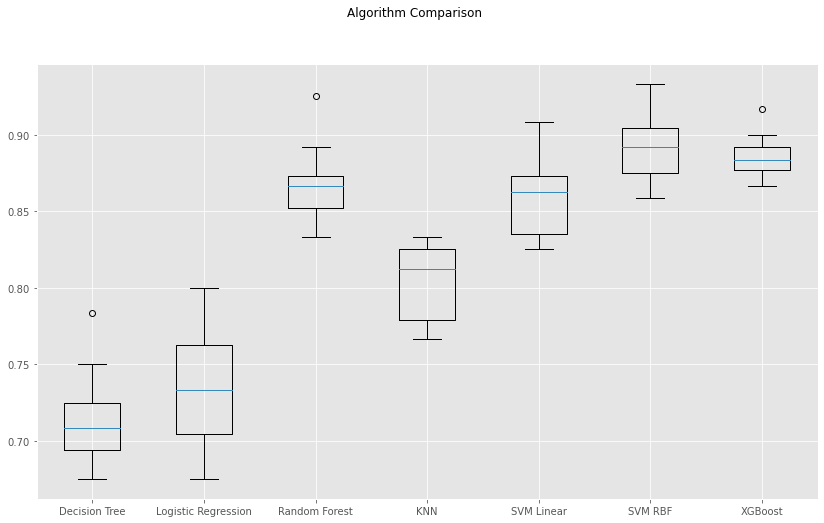

In [27]:
models = []
models.append(('Decision Tree' , DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state = 42)))
models.append(('Logistic Regression' , LogisticRegression()))
models.append(('Random Forest' , RandomForestClassifier(max_depth=15, min_samples_split=8, n_estimators=50,random_state=32)))
models.append(('KNN' , KNeighborsClassifier(metric='manhattan', n_neighbors=25, weights='distance')))
models.append(('SVM Linear' , SVC(kernel = 'linear',C=1000.0)))
models.append(('SVM RBF' , SVC(kernel = 'rbf',C=1000.0,gamma=0.1)))
models.append(('XGBoost' , XGBClassifier()))
kfold = KFold(n_splits=10, random_state=32)
# Evaluate each algorithm for accuracy
results = []
names = []
for name, model in models:
    
    if name in ('KNN','SVM Linear','SVM RBF','XGBoost','Logistic Regression'):        
        cv_results = cross_val_score(model, x_train_scaled, Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print("{} has Accuracy:{}".format(name, cv_results.mean()))
    else:
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        results.append(cv_results)
        names.append(name)
        print("{} has Accuracy:{}".format(name, cv_results.mean()))
        
        
fig = plt.figure(figsize=(14,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show() 

### Prediction of class labels 

In [28]:
test_dataset=pd.read_csv('./CE802_P2_Data/CE802_P2_Test.csv')

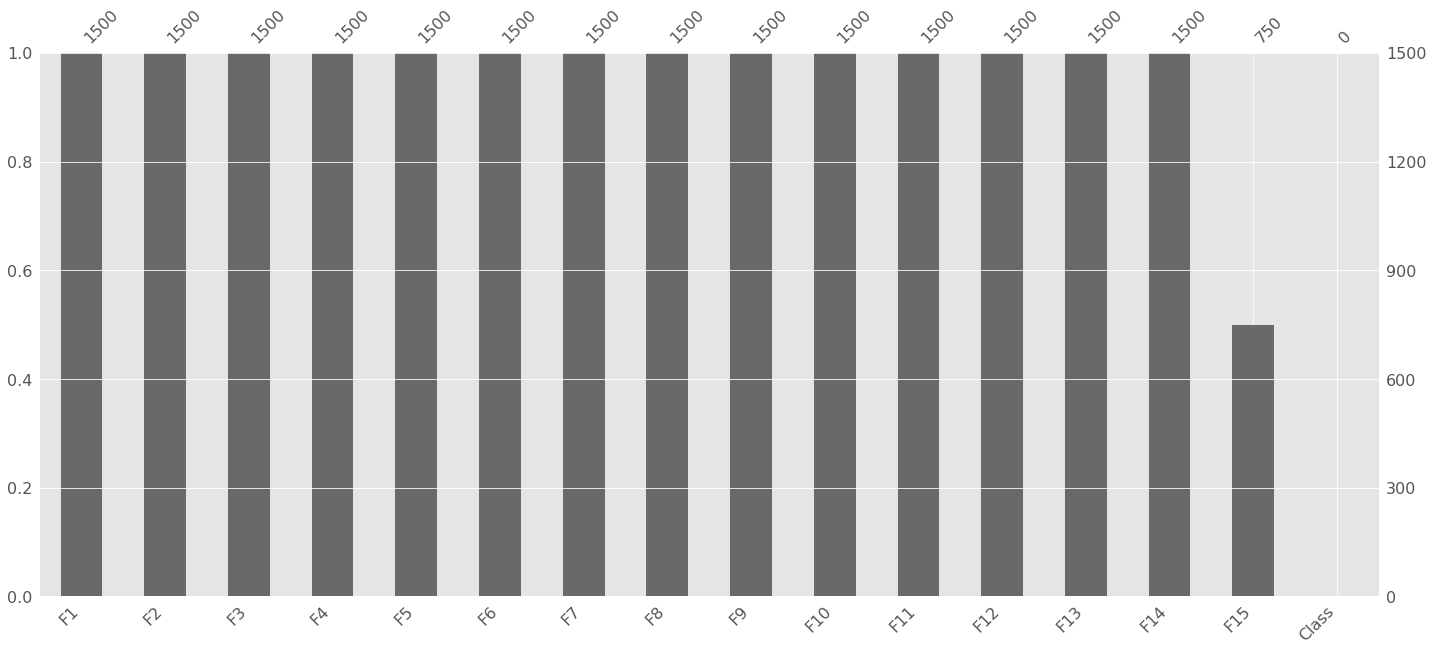

In [29]:
#Checkin if there is any null for any columns 
msno.bar(test_dataset)

In [30]:
#create a copy of the dataset. to keep the originaln one
Test_df=test_dataset.copy()

#Fill the numm values in f15 with the mean values
Test_df['F15'].fillna(Test_df['F15'].mean(), inplace=True)

# Scale the input dataset based on training trasformation
test_df_scaled = scalerx.transform(Test_df.drop(columns='Class'))

#Make prediction on the data
test_dataset['Class'] = svc_rbf.predict(test_df_scaled)

#write to a file
test_dataset.to_csv('CE802_P2_Test.csv')